In [14]:
from funcoesTermosol import *
import numpy as np
import matplotlib.pyplot as plt




In [15]:

def jacobi(ite, tol, K, F):
    tamanho = len(K)
    continuar = True

    erroMax = 0
    lista_x = []
    lista_err = []
    for i in range(tamanho):
        lista_x.append(0)
        lista_err.append(0)
        
    erroMax = 0

    numeroIteracoes = 0

    linhas_x = []
    for i in range(len(K)):
        linhas_x.append(0)
    
    while continuar:
        for i in range(len(linhas_x)):
            temp= 0
            temp2 = 0
            for j in range(len(linhas_x)):
                if i != j:
                    temp = K[i][j] * lista_x[j]
                    temp2 = temp + temp2            
            linhas_x[i] = (F[i][0] - temp2) / K[i][i]

       
            for i in range(len(linhas_x)):
                try:
                    if (linhas_x[i] != 0):
                        lista_err[i] = ((linhas_x[i] - lista_x[i]) / linhas_x[i])
                except:
                    pass
        

        for i in range(len(linhas_x)):
            lista_x[i] = linhas_x[i]

        numeroIteracoes += 1

        if numeroIteracoes == ite:
            continuar = False
        count = 0
        for i in range(len(lista_err)):
            if lista_err[i] < tol and numeroIteracoes > 1:
                count += 1
        if count == len(lista_err):
            continuar = False
    erroMax = max(lista_err)
    return [lista_x]

In [16]:
def gaussSeidel(ite, tol, K, F):
    continuar = True
    tamanho = len(K)

    erroMax = 0
    lista_x = []
    lista_err = []
    for i in range(tamanho):
        lista_x.append(0)
        lista_err.append(0)
        
    erroMax = 0

    numeroIteracoes = 0

    linhas_x = []
    for i in range(len(K)):
        linhas_x.append(0)
    
    while continuar:
        for i in range(len(linhas_x)):
            temp= 0
            temp2 = 0
            for j in range(len(linhas_x)):
                if i != j:
                    if i == 0:
                        temp = K[i][j] * lista_x[j]
                        temp2 = temp + temp2
                    else:
                        temp = K[i][j] * linhas_x[j]
                        temp2 = temp + temp2
                           
            linhas_x[i] = (F[i][0] - temp2) / K[i][i]

        try:
            for i in range(len(linhas_x)):
                if (linhas_x[i] != 0):
                    lista_err[i] = abs((linhas_x[i] - lista_x[i]) / linhas_x[i])
        except:
            pass
        

        for i in range(len(linhas_x)):
            lista_x[i] = linhas_x[i]

        numeroIteracoes += 1

        if numeroIteracoes == ite:
            continuar = False
        count = 0
        for i in range(len(lista_err)):
            if lista_err[i] < tol and numeroIteracoes > 1:
                count += 1
        if count == len(lista_err):
            continuar = False
     
    erroMax = max(lista_err)
    return [lista_x]


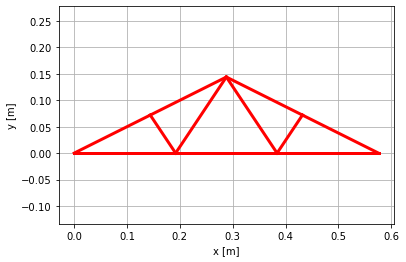

In [17]:

[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada2.xlsx')

plota(N,Inc)


In [18]:
lista_kg = np.zeros((nn*2, nn*2))

lista_deforma = []
lista_tensao = []
lista_ke = []



for i in range(nm):
    n1 = int(Inc[i,0])
    n2 = int(Inc[i,1])        
    E = Inc[i,2]
    A = Inc[i,3]
    x1 = N[0,n1-1]
    y1 = N[1,n1-1]
    x2 = N[0,n2-1]
    y2 = N[1,n2-1]
    L = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    cos = (x2-x1)/L
    sen = (y2-y1)/L
    ke = np.array([[cos**2,cos*sen, -cos**2,-cos*sen], [cos*sen,sen**2,-cos*sen,-sen**2], [-cos**2,-cos*sen,cos**2,cos*sen], [-cos*sen,-sen**2,cos*sen,sen**2]])* E* A/L
    # print(ke)
    # print("---------------------------------")


    lista_ke.append(ke)


In [19]:
# Calculate the dimension of the global matrix
global_size = nn * 2

# Initialize the global matrix with zeros
global_matrix = np.zeros((global_size, global_size))

# Iterate over the elements and add their stiffness matrices to the global matrix
for i in range(nm):
    n1 = int(Inc[i, 0])
    n2 = int(Inc[i, 1])
    ke = lista_ke[i]

    # Determine the corresponding indices in the global matrix
    indices = [n1 * 2 - 2, n1 * 2 - 1, n2 * 2 - 2, n2 * 2 - 1]

    # Add the element stiffness matrix to the global matrix using the indices
    global_matrix[np.ix_(indices, indices)] += ke



In [20]:


matrix_simpl = global_matrix

matrix_simpl = np.delete(matrix_simpl, R.astype(int), axis=0)
matrix_simpl = np.delete(matrix_simpl, R.astype(int), axis=1)


forca = F
forca_simp = np.delete(F, R.astype(int), axis=0)


u2 = np.linalg.solve(matrix_simpl, forca_simp)


# print("Deslocamentos: \n",u2)
# print("Forças: \n",forca_simp)
# print("Matriz de rigidez global: \n",matrix_simpl)


u_compl = u2

for i in R.astype(int):
    u_compl = np.insert(u_compl, i, 0)

print("Deslocamentos completos: \n",u_compl)


Deslocamentos completos: 
 [ 0.          0.          0.00100474 -0.00431173  0.00035977 -0.00466313
  0.00025974 -0.00443928  0.00055859 -0.00463759 -0.00032427 -0.00424778
  0.00116451  0.        ]


In [21]:
jacob = jacobi(10000, 0.0000000000001 , matrix_simpl, forca_simp)

gauss = gaussSeidel(10000, 0.0000000000001 , matrix_simpl, forca_simp)


for i in R.astype(int):
    jacob = np.insert(jacob, i, 0)

for i in R.astype(int):
    gauss = np.insert(gauss, i, 0)



<ipython-input-15-2e728ff7c561>:27: RuntimeWarning: overflow encountered in double_scalars
  temp2 = temp + temp2
<ipython-input-15-2e728ff7c561>:34: RuntimeWarning: invalid value encountered in double_scalars
  lista_err[i] = ((linhas_x[i] - lista_x[i]) / linhas_x[i])
<ipython-input-15-2e728ff7c561>:26: RuntimeWarning: invalid value encountered in double_scalars
  temp = K[i][j] * lista_x[j]
<ipython-input-15-2e728ff7c561>:27: RuntimeWarning: invalid value encountered in double_scalars
  temp2 = temp + temp2


In [22]:

#calcular reacoes de apoio
reacoes = np.dot(global_matrix, u_compl)
reacoes = reacoes[R.astype(int)]


# print("Reações de apoio: \n",reacoes)

#calcular tensao e deformacao
lista_deforma = []
lista_tensao = []
lista_forca_int = []
index_u = 0
for i in range(nm):
    n1 = int(Inc[i,0])
    n2 = int(Inc[i,1])        
    E = Inc[i,2]
    A = Inc[i,3]
    x1 = N[0,n1-1]
    y1 = N[1,n1-1]
    x2 = N[0,n2-1]
    y2 = N[1,n2-1]
    L = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    cos = (x2-x1)/L
    sen = (y2-y1)/L
    index1 = (n1 - 1) *2
    index2 = (n2 - 1) *2
    try:
        temp_desl = np.array([u_compl[index1], u_compl[index1+1], u_compl[index2 ], u_compl[index2 +1]])
        s = E/L* np.dot(np.array([-cos, -sen, cos, sen]), temp_desl)
        e = 1/L* np.dot(np.array([-cos, -sen, cos, sen]), temp_desl)
    except:
        pass

    
    lista_deforma.append(e)
    lista_tensao.append(s)
    lista_forca_int.append(s*A)

print("Deformações: \n",lista_deforma)
print("Tensões: \n",lista_tensao)


Deformações: 
 [-0.00639516081081019, -0.004493151776560604, -0.0037764527201767165, -0.003528364585274597, -0.0007556124065307712, 0.00075561240653076, 0.0019112549106366505, -0.001911254910636643, 0.0018737949772432445, 0.0010355182768975832, 0.0031558652248307407]
Tensões: 
 [-1235161358.99988, -867807334.124915, -729384078.374931, -681468335.9999357, -145938980.19735315, 145938980.197351, 369139773.44036263, -369139773.4403612, 361904761.90476024, 199999999.99999925, 609523809.5238092]


In [23]:

Ft = reacoes
Ut = u_compl
Epsi = lista_deforma
Fi = lista_forca_int
Ti = lista_tensao

nome = "saidanumpy"

geraSaida(nome,Ft,Ut,Epsi,Fi,Ti)

In [24]:


#calcular reacoes de apoio
reacoes = np.dot(global_matrix, gauss)
reacoes = reacoes[R.astype(int)]


lista_deforma = []
lista_tensao = []
lista_forca_int = []
index_u = 0
for i in range(nm):
    n1 = int(Inc[i,0])
    n2 = int(Inc[i,1])        
    E = Inc[i,2]
    A = Inc[i,3]
    x1 = N[0,n1-1]
    y1 = N[1,n1-1]
    x2 = N[0,n2-1]
    y2 = N[1,n2-1]
    L = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    cos = (x2-x1)/L
    sen = (y2-y1)/L
    index1 = (n1 - 1) *2
    index2 = (n2 - 1) *2
    try:
        temp_desl = np.array([gauss[index1], gauss[index1+1], gauss[index2 ], gauss[index2 +1]])
        s = E/L* np.dot(np.array([-cos, -sen, cos, sen]), temp_desl)
        e = 1/L* np.dot(np.array([-cos, -sen, cos, sen]), temp_desl)
    except:
        pass

    
    lista_deforma.append(e)
    lista_tensao.append(s)
    lista_forca_int.append(s*A)


nome = "saidagauss"
Ft = reacoes
Epsi = lista_deforma
Fi = lista_forca_int
Ti = lista_tensao

geraSaida(nome,Ft,gauss,Epsi,Fi,Ti)


In [25]:
 
reacoes = np.dot(global_matrix, jacob)
reacoes = reacoes[R.astype(int)]

lista_deforma = []
lista_tensao = []
lista_forca_int = []
index_u = 0
for i in range(nm):
    n1 = int(Inc[i,0])
    n2 = int(Inc[i,1])        
    E = Inc[i,2]
    A = Inc[i,3]
    x1 = N[0,n1-1]
    y1 = N[1,n1-1]
    x2 = N[0,n2-1]
    y2 = N[1,n2-1]
    L = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    cos = (x2-x1)/L
    sen = (y2-y1)/L
    index1 = (n1 - 1) *2
    index2 = (n2 - 1) *2
    try:
        temp_desl = np.array([jacob[index1], jacob[index1+1], jacob[index2 ], jacob[index2 +1]])
        s = E/L* np.dot(np.array([-cos, -sen, cos, sen]), temp_desl)
        e = 1/L* np.dot(np.array([-cos, -sen, cos, sen]), temp_desl)
    except:
        pass

    
    lista_deforma.append(e)
    lista_tensao.append(s)
    lista_forca_int.append(s*A)


nome = "saidajacobi"
Ft = reacoes
Epsi = lista_deforma
Fi = lista_forca_int
Ti = lista_tensao

geraSaida(nome,Ft,jacob,Epsi,Fi,Ti)

Fator de escala:  5
Diferença entre posições originais e novas: 
 [[ 0.          0.00502369  0.00179884  0.00129871  0.00279294 -0.00162136
   0.00582257]
 [ 0.         -0.02155867 -0.02331565 -0.02219639 -0.02318794 -0.02123892
   0.        ]]


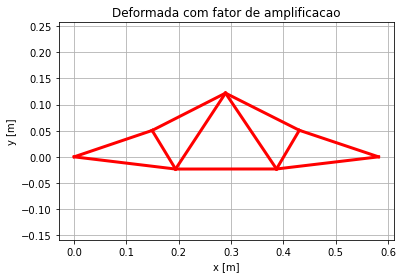

In [26]:

lista_novas_posicoes_x = []
lista_novas_posicoes_y = []




fator = 1

for i in range(nn):
    x = N[0,i]
    y = N[1,i]


    x2 = x + u_compl[i*2]
    y2 = y + u_compl[i*2+1]

    desl_x = u_compl[i*2]
    desl_y = u_compl[i*2+1]


    if i in R.astype(int):
        lista_novas_posicoes_x.append(x)
        lista_novas_posicoes_y.append(y) 
    else:            
        lista_novas_posicoes_x.append(x2)
        lista_novas_posicoes_y.append(y2)



lista_novas_posicoes = np.array([lista_novas_posicoes_x, lista_novas_posicoes_y])



fator = 1



fator = int(input("Digite o fator de aumento minimo para a escala [recomendação de 1000 para ex1 e 5 para ex2]:"))



print("Fator de escala: ",fator)

lista_novas_posicoes_x_fator = []
lista_novas_posicoes_y_fator = []
for i in range(nn):
    x = N[0,i]
    y = N[1,i]


    x2 = x + u_compl[i*2]
    y2 = y + u_compl[i*2+1]

    desl_x = u_compl[i*2] * fator
    desl_y = u_compl[i*2+1] * fator
    

    x2 = x + desl_x
    y2 = y + desl_y  

   


    lista_novas_posicoes_x_fator.append(x2)
    lista_novas_posicoes_y_fator.append(y2)


    
lista_novas_posicoes_fator = np.array([lista_novas_posicoes_x_fator, lista_novas_posicoes_y_fator])




#diferenca entre posicoes originais e novas
print("Diferença entre posições originais e novas: \n",lista_novas_posicoes_fator - N)



plota_mais(lista_novas_posicoes_fator,Inc)